[Orignal paper](https://arxiv.org/abs/1502.03167)

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm
from MyHelper import *
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
downloadData(filename,loc)

In [4]:
X,y=getData(filename,loc,flat=True)
Xtest,ytest=getData(filename,loc,flat=True,test=True)

In [5]:
print(X.shape,y.shape)
print(Xtest.shape,ytest.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [6]:
img_size = np.sqrt(X.shape[1])
print(img_size)

28.0


/Users/tmulc/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


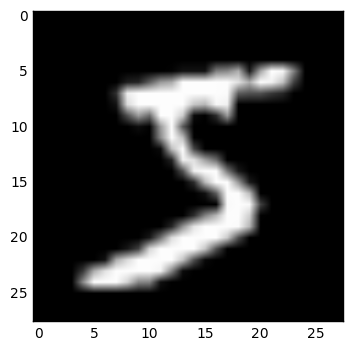

In [7]:
plt.imshow(X[0,:].reshape(img_size,img_size),cmap='gray')

# Model

In [8]:
def createWeight(size):
    return tf.Variable(tf.truncated_normal(size, stddev=0.1))

def createBias(size):
    return tf.Variable(tf.constant(0.1,shape=size))

In [9]:
batch_size = 32
num_nodes=1000
g = tf.Graph()
with g.as_default():
    img_input = tf.placeholder(tf.float32,shape=(batch_size,int(img_size**2)))
    targets = tf.placeholder(tf.float32,shape=(batch_size,10))
    
    testX = tf.constant(Xtest,dtype=tf.float32)
    testy = tf.constant(ytest,dtype=tf.float32)
    
    #create weights
    W1 = createWeight([int(img_size**2),num_nodes])
    b1 = createBias([num_nodes])
    
    W2 = createWeight([num_nodes,num_nodes])
    b2 = createBias([num_nodes])
    
    W_logit = createWeight([num_nodes,10])
    b_logit = createBias([10])

    
    #model
    def model(img_input):
        h1 = tf.nn.relu(tf.matmul(img_input,W1)+b1)
        h2 = tf.nn.relu(tf.matmul(h1,W2)+b2)
        logit = tf.matmul(h2,W_logit)+b_logit
        return logit
    
    
    #train
    logit_train=model(img_input)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logit_train,targets))
    opt = tf.train.AdamOptimizer(learning_rate=.005).minimize(loss)
    
    train_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_train),1),tf.arg_max(targets,1)),tf.float32))
    
    #test
    logit_test = model(testX)
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_test),1),tf.arg_max(testy,1)),tf.float32))
    
    init = tf.initialize_all_variables()

In [10]:
sess=tf.Session(graph=g)
sess.run(init)
losses = []

In [11]:
num_steps = 2000
for s in tqdm(range(num_steps)):
    offset = (s*batch_size) % (X.shape[0]-batch_size)
    fd = {img_input:X[offset:offset+batch_size,:],
         targets:y[offset:offset+batch_size,:]}
    l,_ = sess.run([loss,opt],feed_dict=fd)
    losses.append(l)
    if s % 100 == 0:
        print('train acc: ',sess.run([train_accuracy],feed_dict=fd))
        print('test acc: ',sess.run([test_accuracy],feed_dict=fd))

  0%|          | 0/2000 [00:00<?, ?it/s]

train acc:  [0.4375]


  1%|          | 12/2000 [00:00<17:14,  1.92it/s]

test acc:  [0.24150001]


  5%|▍         | 93/2000 [00:01<01:15, 25.14it/s]

train acc:  [0.875]


  6%|▌         | 113/2000 [00:02<01:10, 26.82it/s]

test acc:  [0.81819999]


 10%|▉         | 199/2000 [00:03<00:18, 94.80it/s]

train acc:  [0.96875]


 11%|█         | 224/2000 [00:03<00:31, 55.97it/s]

test acc:  [0.84030002]


 14%|█▍        | 290/2000 [00:04<00:16, 105.82it/s]

train acc:  [0.9375]


 16%|█▌        | 316/2000 [00:05<00:27, 61.39it/s] 

test acc:  [0.82169998]


 20%|█▉        | 397/2000 [00:05<00:13, 114.99it/s]

train acc:  [0.96875]


 21%|██        | 423/2000 [00:06<00:25, 62.65it/s] 

test acc:  [0.81910002]


 24%|██▍       | 488/2000 [00:06<00:13, 108.74it/s]

train acc:  [0.84375]


 26%|██▌       | 514/2000 [00:07<00:24, 59.63it/s] 

test acc:  [0.8836]


 30%|██▉       | 592/2000 [00:08<00:12, 112.53it/s]

train acc:  [0.90625]


 31%|███       | 618/2000 [00:08<00:22, 62.22it/s] 

test acc:  [0.87080002]


 35%|███▍      | 699/2000 [00:09<00:11, 114.81it/s]

train acc:  [0.9375]


 36%|███▋      | 725/2000 [00:10<00:20, 62.96it/s] 

test acc:  [0.84509999]


 40%|███▉      | 791/2000 [00:10<00:11, 109.44it/s]

train acc:  [0.875]


 41%|████      | 817/2000 [00:11<00:19, 62.04it/s] 

test acc:  [0.84930003]


 45%|████▍     | 895/2000 [00:12<00:09, 112.25it/s]

train acc:  [0.9375]


 46%|████▌     | 919/2000 [00:12<00:19, 55.33it/s] 

test acc:  [0.86989999]


 50%|████▉     | 998/2000 [00:13<00:09, 101.33it/s]

train acc:  [0.8125]


 51%|█████     | 1021/2000 [00:14<00:18, 54.10it/s]

test acc:  [0.88270003]


 55%|█████▍    | 1097/2000 [00:14<00:08, 109.26it/s]

train acc:  [0.84375]


 56%|█████▌    | 1122/2000 [00:15<00:14, 61.31it/s] 

test acc:  [0.89660001]


 60%|█████▉    | 1199/2000 [00:16<00:07, 113.73it/s]

train acc:  [0.90625]


 61%|██████    | 1224/2000 [00:16<00:12, 63.15it/s] 

test acc:  [0.89349997]


 64%|██████▍   | 1289/2000 [00:17<00:06, 108.87it/s]

train acc:  [0.8125]


 66%|██████▌   | 1314/2000 [00:18<00:10, 62.59it/s] 

test acc:  [0.89050001]


 70%|██████▉   | 1394/2000 [00:18<00:05, 114.93it/s]

train acc:  [0.9375]


 71%|███████   | 1419/2000 [00:19<00:09, 63.12it/s] 

test acc:  [0.89829999]


 75%|███████▍  | 1497/2000 [00:19<00:04, 115.12it/s]

train acc:  [0.9375]


 76%|███████▌  | 1522/2000 [00:20<00:07, 63.59it/s] 

test acc:  [0.89209998]


 80%|████████  | 1600/2000 [00:21<00:03, 114.40it/s]

train acc:  [0.875]


 81%|████████▏ | 1626/2000 [00:21<00:05, 62.92it/s] 

test acc:  [0.90329999]


 85%|████████▍ | 1693/2000 [00:22<00:02, 104.41it/s]

train acc:  [0.96875]


 86%|████████▌ | 1718/2000 [00:23<00:04, 59.98it/s] 

test acc:  [0.87940001]


 90%|█████████ | 1800/2000 [00:23<00:01, 115.56it/s]

train acc:  [0.9375]


 91%|█████████▏| 1826/2000 [00:24<00:02, 64.66it/s] 

test acc:  [0.87459999]


 95%|█████████▍| 1895/2000 [00:24<00:00, 111.68it/s]

train acc:  [0.8125]


 96%|█████████▌| 1922/2000 [00:25<00:01, 63.18it/s] 

test acc:  [0.89780003]


100%|██████████| 2000/2000 [00:26<00:00, 76.50it/s] 


In [12]:
p = figure(title="training loss", x_axis_label='train steps', y_axis_label='loss')
p.line(range(len(losses)),losses)
show(p)

# Batch Normalization

In [13]:
batch_size = 32
num_nodes=1000
eps = .0001
g = tf.Graph()
with g.as_default():
    img_input = tf.placeholder(tf.float32,shape=(batch_size,int(img_size**2)))
    targets = tf.placeholder(tf.float32,shape=(batch_size,10))
    
    testX = tf.constant(Xtest,dtype=tf.float32)
    testy = tf.constant(ytest,dtype=tf.float32)
    
    #create weights
    gamma0 = tf.Variable(tf.truncated_normal([int(img_size**2)]))
    beta0 = tf.Variable(tf.ones([int(img_size**2)]))
    
    W1 = createWeight([int(img_size**2),num_nodes])
    b1 = createBias([num_nodes])
    
    gamma1 = tf.Variable(tf.truncated_normal([num_nodes]))
    beta1 = tf.Variable(tf.ones([num_nodes]))
    
    W2 = createWeight([num_nodes,num_nodes])
    b2 = createBias([num_nodes])
    
    gamma2 = tf.Variable(tf.truncated_normal([num_nodes]))
    beta2 = tf.Variable(tf.ones([num_nodes]))
    
    W_logit = createWeight([num_nodes,10])
    b_logit = createBias([10])
    
    gammalo = tf.Variable(tf.truncated_normal([10]))
    betalo = tf.Variable(tf.ones([10]))

    
    #model
    def model(img_input):
        mu0 = tf.reduce_mean(img_input,[0],keep_dims=True)
        sigma0 = tf.reduce_mean(tf.square(img_input-mu0),[0],keep_dims=True)
        input_hat = (img_input-mu0)/(tf.sqrt(sigma0+eps))
        input_out = gamma0*input_hat+beta0

        h1 = tf.nn.relu(tf.matmul(input_out,W1)+b1)
        mu1 = tf.reduce_mean(h1,[0],keep_dims=True)
        sigma1 = tf.reduce_mean(tf.square(h1-mu1),[0],keep_dims=True)
        h1_hat = (h1-mu1)/(tf.sqrt(sigma1+eps))
        h1_out = gamma1*h1_hat+beta1

        h2 = tf.nn.relu(tf.matmul(h1_out,W2)+b2)
        mu2 = tf.reduce_mean(h2,[0],keep_dims=True)
        sigma2 = tf.reduce_mean(tf.square(h2-mu2),[0],keep_dims=True)
        h2_hat = (h2-mu2)/(tf.sqrt(sigma2+eps))
        h2_out = gamma2*h2_hat+beta2

        logit = tf.matmul(h2_out,W_logit)+b_logit
        mulo = tf.reduce_mean(logit,[0],keep_dims=True)
        sigmalo = tf.reduce_mean(tf.square(logit-mulo),[0],keep_dims=True)
        lo_hat = (logit-mulo)/(tf.sqrt(sigmalo+eps))
        lo_out = gammalo*lo_hat+betalo
        
        return lo_out
    
    #train
    logit_train = model(img_input)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logit_train,targets))
    
    opt = tf.train.AdamOptimizer(learning_rate=.005).minimize(loss)
    
    train_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_train),1),tf.arg_max(targets,1)),tf.float32))
    
    #test
    logit_test = model(testX)
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_test),1),tf.arg_max(testy,1)),tf.float32))
    
    init = tf.initialize_all_variables()

In [14]:
sess=tf.Session(graph=g)
sess.run(init)
losses = []

In [15]:
num_steps = 2000
for s in tqdm(range(num_steps)):
    offset = (s*batch_size) % (X.shape[0]-batch_size)
    fd = {img_input:X[offset:offset+batch_size,:],
         targets:y[offset:offset+batch_size,:]}
    l,_ = sess.run([loss,opt],feed_dict=fd)
    losses.append(l)
    if s % 100 == 0:
        print('train acc: ',sess.run([train_accuracy],feed_dict=fd))
        print('test acc: ',sess.run([test_accuracy],feed_dict=fd))

  0%|          | 0/2000 [00:00<?, ?it/s]

train acc:  [0.5]


  0%|          | 10/2000 [00:01<29:30,  1.12it/s]

test acc:  [0.29190001]


  5%|▍         | 99/2000 [00:02<01:09, 27.55it/s]

train acc:  [0.8125]


  6%|▌         | 117/2000 [00:03<01:23, 22.42it/s]

test acc:  [0.83749998]


 10%|▉         | 198/2000 [00:04<00:23, 77.77it/s]

train acc:  [0.875]


 11%|█         | 216/2000 [00:05<00:59, 30.07it/s]

test acc:  [0.8574]


 15%|█▍        | 296/2000 [00:06<00:21, 80.59it/s]

train acc:  [0.875]


 16%|█▌        | 314/2000 [00:07<00:55, 30.28it/s]

test acc:  [0.88150001]


 20%|█▉        | 395/2000 [00:08<00:19, 80.92it/s]

train acc:  [0.84375]


 21%|██        | 413/2000 [00:09<00:52, 30.33it/s]

test acc:  [0.88599998]


 25%|██▍       | 494/2000 [00:10<00:18, 80.68it/s]

train acc:  [0.8125]


 26%|██▌       | 512/2000 [00:11<00:49, 30.29it/s]

test acc:  [0.89590001]


 30%|██▉       | 593/2000 [00:12<00:17, 80.81it/s]

train acc:  [0.90625]


 31%|███       | 611/2000 [00:13<00:45, 30.48it/s]

test acc:  [0.89639997]


 35%|███▍      | 692/2000 [00:14<00:16, 79.81it/s]

train acc:  [0.9375]


 36%|███▌      | 710/2000 [00:15<00:42, 30.49it/s]

test acc:  [0.8998]


 40%|████      | 800/2000 [00:16<00:14, 82.34it/s]

train acc:  [0.9375]


 41%|████      | 818/2000 [00:17<00:38, 30.71it/s]

test acc:  [0.90259999]


 45%|████▍     | 899/2000 [00:18<00:13, 80.40it/s]

train acc:  [0.9375]


 46%|████▌     | 917/2000 [00:19<00:35, 30.34it/s]

test acc:  [0.90719998]


 50%|████▉     | 996/2000 [00:20<00:12, 79.19it/s]

train acc:  [0.8125]


 51%|█████     | 1014/2000 [00:22<00:32, 30.47it/s]

test acc:  [0.90689999]


 55%|█████▍    | 1095/2000 [00:22<00:11, 80.39it/s]

train acc:  [0.84375]


 56%|█████▌    | 1113/2000 [00:24<00:29, 30.51it/s]

test acc:  [0.90979999]


 60%|█████▉    | 1194/2000 [00:25<00:10, 78.17it/s]

train acc:  [0.9375]


 61%|██████    | 1212/2000 [00:26<00:26, 30.15it/s]

test acc:  [0.91769999]


 65%|██████▍   | 1293/2000 [00:27<00:08, 80.29it/s]

train acc:  [0.90625]


 66%|██████▌   | 1311/2000 [00:28<00:22, 30.41it/s]

test acc:  [0.9192]


 70%|██████▉   | 1392/2000 [00:29<00:07, 80.75it/s]

train acc:  [0.8125]


 70%|███████   | 1410/2000 [00:30<00:19, 30.35it/s]

test acc:  [0.92180002]


 75%|███████▌  | 1500/2000 [00:31<00:06, 81.52it/s]

train acc:  [0.9375]


 75%|███████▌  | 1509/2000 [00:32<00:22, 21.72it/s]

test acc:  [0.91390002]


 80%|████████  | 1600/2000 [00:33<00:06, 65.72it/s]

train acc:  [0.875]


 81%|████████  | 1614/2000 [00:35<00:18, 21.08it/s]

test acc:  [0.92479998]


 85%|████████▍ | 1694/2000 [00:36<00:04, 75.12it/s]

train acc:  [0.9375]


 86%|████████▌ | 1712/2000 [00:37<00:09, 29.75it/s]

test acc:  [0.92629999]


 90%|████████▉ | 1793/2000 [00:38<00:02, 80.68it/s]

train acc:  [0.875]


 91%|█████████ | 1811/2000 [00:39<00:06, 30.64it/s]

test acc:  [0.9235]


 95%|█████████▍| 1892/2000 [00:40<00:01, 80.54it/s]

train acc:  [0.84375]


 96%|█████████▌| 1910/2000 [00:41<00:02, 30.55it/s]

test acc:  [0.92030001]


100%|██████████| 2000/2000 [00:42<00:00, 82.85it/s]


In [16]:
p = figure(title="training loss", x_axis_label='train steps', y_axis_label='loss')
p.line(range(len(losses)),losses)
show(p)

# Simplify code

In [17]:
def createWeightsBN(s):
    """
    Creates weights for batch normalization layer
    
    Parameters:
    -----------
    s: int
        size of to be normalized
    """
    gamma = tf.Variable(tf.truncated_normal([s]))
    beta = tf.Variable(tf.ones([s]))
    return [gamma,beta]

def BN(x,variables,eps=.0001):
    """
    Applies Batch Normalization
    
    Parameters:
    ------------
    x: tensor
        the data to normalize
    variables: [gamma,beta]
        parameters to learn
        
    eps (optional): float
        small number to keep from dividing by zero
    """
    gamma,beta = variables[0],variables[1]
    
    mu = tf.reduce_mean(x,[0],keep_dims=True)
    sigma = tf.reduce_mean(tf.square(x-mu),[0],keep_dims=True)
    x_hat = (x-mu)/(tf.sqrt(sigma+eps))
    y = gamma*x_hat+beta
    return y

In [18]:
batch_size = 32
num_nodes=1000
eps = .0001
g = tf.Graph()
with g.as_default():
    img_input = tf.placeholder(tf.float32,shape=(batch_size,int(img_size**2)))
    targets = tf.placeholder(tf.float32,shape=(batch_size,10))
    
    testX = tf.constant(Xtest,dtype=tf.float32)
    testy = tf.constant(ytest,dtype=tf.float32)
    
    #create weights
    bn_0 = createWeightsBN(int(img_size**2))
    
    W1 = createWeight([int(img_size**2),num_nodes])
    b1 = createBias([num_nodes])
    
    bn_1 = createWeightsBN(num_nodes)
    
    W2 = createWeight([num_nodes,num_nodes])
    b2 = createBias([num_nodes])
    
    bn_2 = createWeightsBN(num_nodes)
    
    W_logit = createWeight([num_nodes,10])
    b_logit = createBias([10])
    
    bn_logit = createWeightsBN(10)

    
    #model
    def model(img_input):
        input_bn = BN(img_input,bn_0)

        h1 = tf.nn.relu(tf.matmul(input_bn,W1)+b1)
        h1_bn = BN(h1,bn_1)

        h2 = tf.nn.relu(tf.matmul(h1_bn,W2)+b2)
        h2_bn = BN(h2,bn_2)

        logit = tf.matmul(h2_bn,W_logit)+b_logit
        lo_bn = BN(logit,bn_logit)
        
        return lo_bn
    
    #train
    logit_train = model(img_input)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logit_train,targets))
    opt = tf.train.AdamOptimizer(learning_rate=.001).minimize(loss)
    
    train_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_train),1),tf.arg_max(targets,1)),tf.float32))
    
    #test
    logit_test = model(testX)
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_test),1),tf.arg_max(testy,1)),tf.float32))
    
    init = tf.initialize_all_variables()

In [19]:
sess=tf.Session(graph=g)
sess.run(init)
losses = []

In [20]:
num_steps = 2000
for s in tqdm(range(num_steps)):
    offset = (s*batch_size) % (X.shape[0]-batch_size)
    fd = {img_input:X[offset:offset+batch_size,:],
         targets:y[offset:offset+batch_size,:]}
    l,_ = sess.run([loss,opt],feed_dict=fd)
    losses.append(l)
    if s % 100 == 0:
        print('train acc: ',sess.run([train_accuracy],feed_dict=fd))
        print('test acc: ',sess.run([test_accuracy],feed_dict=fd))

  0%|          | 0/2000 [00:00<?, ?it/s]

train acc:  [0.5625]


  0%|          | 10/2000 [00:01<29:20,  1.13it/s]

test acc:  [0.18340001]


  5%|▍         | 99/2000 [00:02<01:08, 27.65it/s]

train acc:  [0.71875]


  6%|▌         | 117/2000 [00:03<01:23, 22.48it/s]

test acc:  [0.78909999]


 10%|▉         | 198/2000 [00:04<00:23, 77.87it/s]

train acc:  [0.75]


 11%|█         | 216/2000 [00:05<00:58, 30.28it/s]

test acc:  [0.8369]


 15%|█▍        | 297/2000 [00:06<00:21, 80.71it/s]

train acc:  [0.90625]


 16%|█▌        | 315/2000 [00:07<00:56, 29.97it/s]

test acc:  [0.86229998]


 20%|█▉        | 395/2000 [00:08<00:19, 80.56it/s]

train acc:  [0.8125]


 21%|██        | 413/2000 [00:09<00:52, 30.12it/s]

test acc:  [0.87919998]


 25%|██▍       | 494/2000 [00:10<00:18, 79.84it/s]

train acc:  [0.78125]


 26%|██▌       | 512/2000 [00:11<00:49, 29.82it/s]

test acc:  [0.89200002]


 30%|██▉       | 593/2000 [00:12<00:17, 80.43it/s]

train acc:  [0.90625]


 31%|███       | 611/2000 [00:13<00:45, 30.52it/s]

test acc:  [0.90100002]


 35%|███▍      | 692/2000 [00:14<00:16, 80.66it/s]

train acc:  [0.90625]


 36%|███▌      | 710/2000 [00:15<00:42, 30.15it/s]

test acc:  [0.89539999]


 40%|████      | 800/2000 [00:16<00:14, 82.12it/s]

train acc:  [0.90625]


 40%|████      | 809/2000 [00:18<00:55, 21.63it/s]

test acc:  [0.90859997]


 45%|████▍     | 897/2000 [00:19<00:16, 68.24it/s]

train acc:  [0.9375]


 46%|████▌     | 914/2000 [00:20<00:43, 24.97it/s]

test acc:  [0.90319997]


 50%|████▉     | 996/2000 [00:21<00:14, 71.45it/s]

train acc:  [0.84375]


 51%|█████     | 1011/2000 [00:22<00:39, 25.05it/s]

test acc:  [0.90930003]


 55%|█████▍    | 1097/2000 [00:23<00:12, 70.90it/s]

train acc:  [0.90625]


 56%|█████▌    | 1114/2000 [00:25<00:34, 25.52it/s]

test acc:  [0.91619998]


 60%|█████▉    | 1195/2000 [00:26<00:11, 70.99it/s]

train acc:  [0.84375]


 61%|██████    | 1212/2000 [00:27<00:31, 25.35it/s]

test acc:  [0.9145]


 65%|██████▍   | 1298/2000 [00:28<00:08, 79.95it/s]

train acc:  [0.875]


 66%|██████▌   | 1316/2000 [00:29<00:24, 28.44it/s]

test acc:  [0.9138]


 70%|██████▉   | 1396/2000 [00:30<00:08, 71.89it/s]

train acc:  [0.8125]


 71%|███████   | 1413/2000 [00:31<00:22, 26.18it/s]

test acc:  [0.92199999]


 75%|███████▍  | 1496/2000 [00:32<00:06, 76.93it/s]

train acc:  [0.96875]


 76%|███████▌  | 1513/2000 [00:33<00:16, 28.92it/s]

test acc:  [0.91729999]


 80%|███████▉  | 1593/2000 [00:34<00:05, 77.23it/s]

train acc:  [0.90625]


 81%|████████  | 1611/2000 [00:36<00:12, 30.34it/s]

test acc:  [0.91979998]


 85%|████████▍ | 1692/2000 [00:37<00:04, 76.48it/s]

train acc:  [0.90625]


 85%|████████▌ | 1709/2000 [00:38<00:10, 28.87it/s]

test acc:  [0.91970003]


 90%|████████▉ | 1799/2000 [00:39<00:02, 79.11it/s]

train acc:  [0.84375]


 91%|█████████ | 1817/2000 [00:40<00:06, 29.90it/s]

test acc:  [0.92650002]


 95%|█████████▍| 1898/2000 [00:41<00:01, 78.47it/s]

train acc:  [0.8125]


 96%|█████████▌| 1916/2000 [00:42<00:02, 30.47it/s]

test acc:  [0.92199999]


100%|██████████| 2000/2000 [00:43<00:00, 46.10it/s]


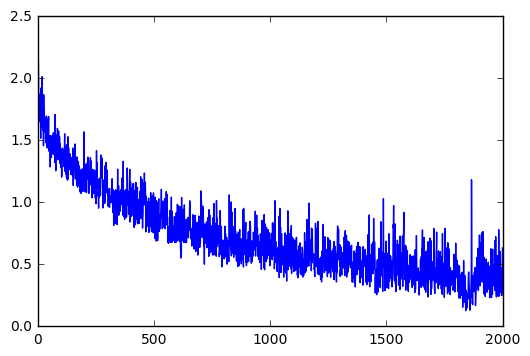

In [21]:
plt.plot(losses)